In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load IMDB Dataset
imdb = keras.datasets.imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)  # Limit vocabulary to 10,000 words

# Convert word indices back to words (Optional: Useful for debugging)
word_index = keras.datasets.imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

def decode_review(text):
    return " ".join([reverse_word_index.get(i, "?") for i in text])

print("Sample review:", decode_review(X_train[0]))  # Example review in readable format

# Preprocessing: Pad Sequences to Ensure Fixed Length
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=256)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=256)

# Define DNN Model
model = keras.Sequential([
    keras.layers.Embedding(input_dim=10000, output_dim=16),  # Embedding layer for word representation
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Binary output (positive vs negative)
])

# Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Sample review: the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he shoul

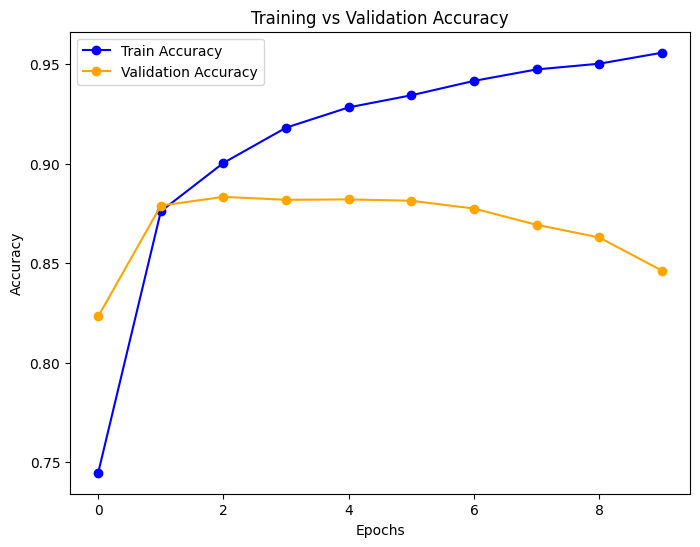

In [2]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o', color="blue")
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o', color="orange")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend()
plt.show()



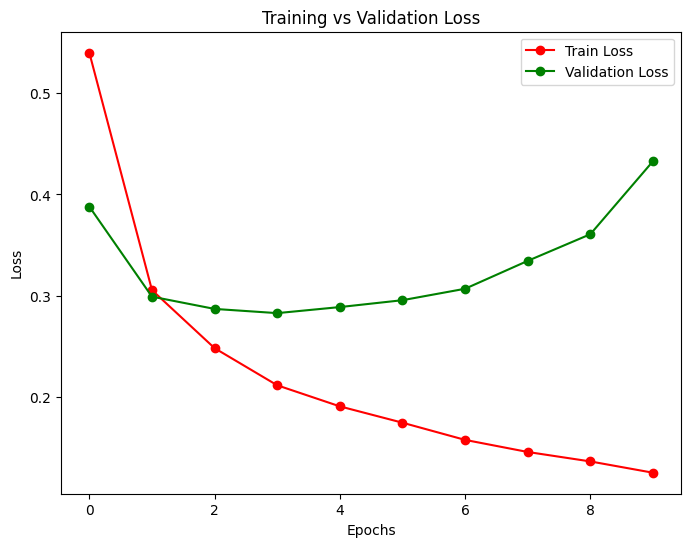

In [3]:
# Plot Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss', marker='o', color="red")
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o', color="green")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.show()

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


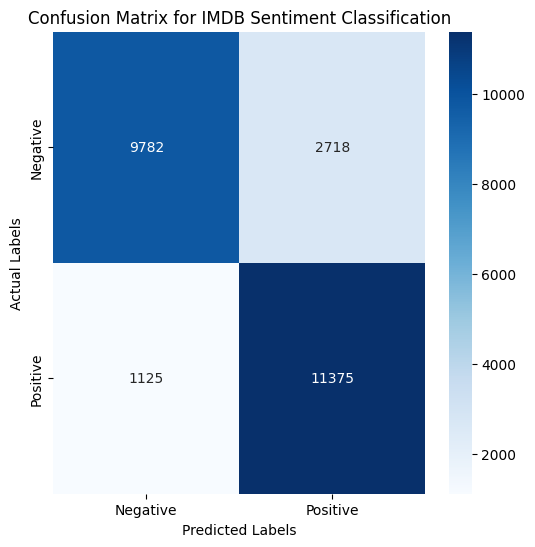

In [4]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Get Predictions
y_pred_probs = model.predict(X_test)  # Get probability scores
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary labels (0 = Negative, 1 = Positive)

# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix for IMDB Sentiment Classification")
plt.show()

In [5]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

Precision: 0.8071


In [6]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

Recall: 0.9100


In [7]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

F1-Score: 0.8555
